In [2]:
import tensorflow as tf
import keras
import numpy as np
import sktime
import matplotlib.pyplot as plt
import pandas as pd

## Previsão de series temporais

In [ ]:
def generate_time_series_data(batch_size, n_steps):
    # gerando dados de séries temporais sintéticos
    # com duas frequências e um deslocamento
    freq1, freq2, offeset1, offset2 = np.random.rand(4, batch_size, 1)
    
    # criando uma grade de tempo
    time = tf.linspace(0.0, 1.0, n_steps)

    # gerando a série temporal
    # adicionando uma frequência
    series = 0.5 * tf.sin((time - offeset1) * (freq1 * 10 + 10))
    # adicionando uma segunda frequência
    series += 0.2 * tf.sin((time - offset2) * (freq2 * 20 + 20))
    # adicionando ruído
    series += 0.1 * (tf.random.normal((batch_size, n_steps), dtype=tf.float32) - 0.5)

    return series[..., tf.newaxis] # adicionando uma dimensão para o canal

In [ ]:
n_steps = 50

series = generate_time_series_data(batch_size=10000, n_steps=n_steps)

In [ ]:
series = series.numpy()  # Convertendo para numpy array para manipulação posterior

In [ ]:
x_train, y_train = series[:7000, :n_steps], series[:7000, -1]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
x_test, y_test = series[9000:, :n_steps], series[9000:, -1]

### Baseline de métricas

Previsão ingenua : é predizer o último valor de cada série

In [ ]:
np.mean(
    keras.losses.mean_squared_error(x_valid[:, -1], y_valid)
)

np.float32(0.0)

## Implementando uma RNN Simples

In [ ]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])  
])

In [ ]:
model.compile(
    loss=keras.losses.mean_squared_error,
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=[keras.metrics.MeanAbsoluteError()]
)
history = model.fit( x_train, y_train, 
                    validation_data=(x_valid, y_valid),
                    epochs=20,
                    batch_size=32)

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - loss: 0.0721 - mean_absolute_error: 0.2039 - val_loss: 0.0030 - val_mean_absolute_error: 0.0451
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0022 - mean_absolute_error: 0.0374 - val_loss: 8.8625e-04 - val_mean_absolute_error: 0.0226
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 7.8861e-04 - mean_absolute_error: 0.0209 - val_loss: 5.6623e-04 - val_mean_absolute_error: 0.0172
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 5.3871e-04 - mean_absolute_error: 0.0170 - val_loss: 5.1931e-04 - val_mean_absolute_error: 0.0168
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 5.2210e-04 - mean_absolute_error: 0.0168 - val_loss: 5.2515e-04 - val_mean_absolute_error: 0.0173
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 5.5019e-04 - mean_absolute_error: 0.0171 - val_loss: 5.2863e-04 - val_mean_absolute_error: 0.0177
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - lo

<Axes: >

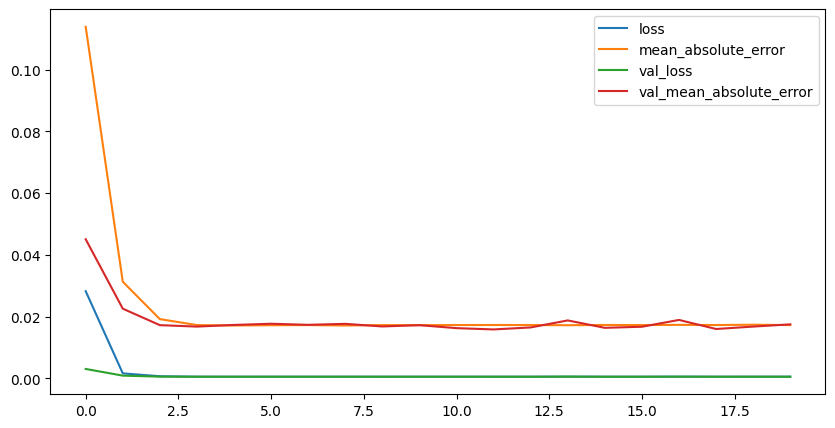

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10, 5))

In [ ]:
for i in range(10):
    y_pred = model.predict(x_test[i:i+1])

    keras.layers.SimpleRNN(50, return_sequences=True),


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


## RNNs Profundas

In [ ]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, input_shape=[None, 1], return_sequences=True),  
    keras.layers.SimpleRNN(20, return_sequences=True),  
    keras.layers.SimpleRNN(1),  
])

c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


`return_seguences` :Retorna toda a sequência de saídas ocultas, uma para cada passo de tempo.
> Faça questão de usar `return_sequences = True` para todas as camadas recorrentes, exceto a última.   

In [ ]:
model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=[keras.metrics.MeanAbsoluteError()]
)

In [ ]:
history = model.fit( x_train, y_train, 
                    validation_data=(x_valid, y_valid),
                    epochs=20,
                    batch_size=32
                    )

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - loss: 0.0154 - mean_absolute_error: 0.0720 - val_loss: 8.3378e-04 - val_mean_absolute_error: 0.0223
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 7.6176e-04 - mean_absolute_error: 0.0204 - val_loss: 7.5424e-04 - val_mean_absolute_error: 0.0207
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 6.4612e-04 - mean_absolute_error: 0.0191 - val_loss: 0.0011 - val_mean_absolute_error: 0.0255
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 6.3303e-04 - mean_absolute_error: 0.0189 - val_loss: 4.5988e-04 - val_mean_absolute_error: 0.0155
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 4.6118e-04 - mean_absolute_error: 0.0160 - val_loss: 7.9612e-04 - val_mean_absolute_error: 0.0226
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 5.0293e-04 - mean_absolute_error: 0.0167 - val_loss: 5.0350e-04 - val_mean_absolute_error: 0.0162
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step 

<Axes: >

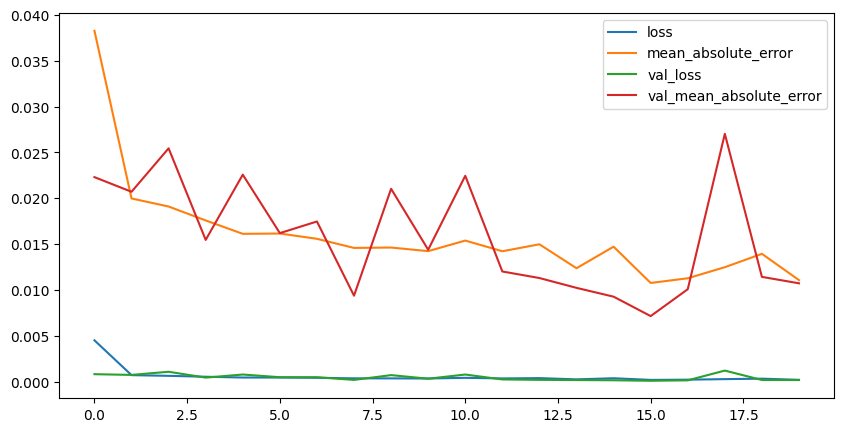

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10, 5))

In [ ]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, input_shape=[None, 1], return_sequences=True),  
    keras.layers.SimpleRNN(20),  
    keras.layers.Dense(1),  
])

c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


> Como o  keras.layers.SimpleRNN(20) virou a última camada é removido o return_seguences

In [ ]:
model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=[keras.metrics.MeanAbsoluteError()]
)
history = model.fit( x_train, y_train, 
                    validation_data=(x_valid, y_valid),
                    epochs=20,
                    batch_size=32)

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.0336 - mean_absolute_error: 0.1004 - val_loss: 3.6625e-04 - val_mean_absolute_error: 0.0149
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 3.2957e-04 - mean_absolute_error: 0.0142 - val_loss: 1.7781e-04 - val_mean_absolute_error: 0.0102
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 1.9191e-04 - mean_absolute_error: 0.0107 - val_loss: 1.2182e-04 - val_mean_absolute_error: 0.0085
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 1.2557e-04 - mean_absolute_error: 0.0086 - val_loss: 1.8314e-04 - val_mean_absolute_error: 0.0112
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 1.2440e-04 - mean_absolute_error: 0.0086 - val_loss: 5.8104e-05 - val_mean_absolute_error: 0.0055
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 8.5278e-05 - mean_absolute_error: 0.0071 - val_loss: 4.6149e-05 - val_mean_absolute_error: 0.0051
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/s

<Axes: >

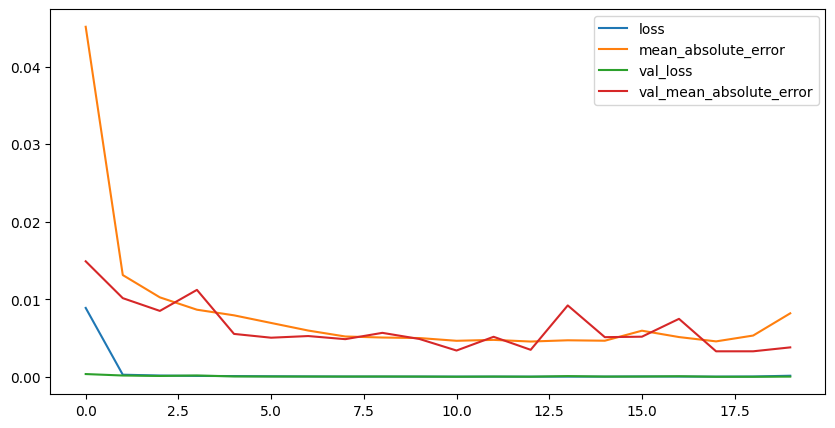

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10, 5))

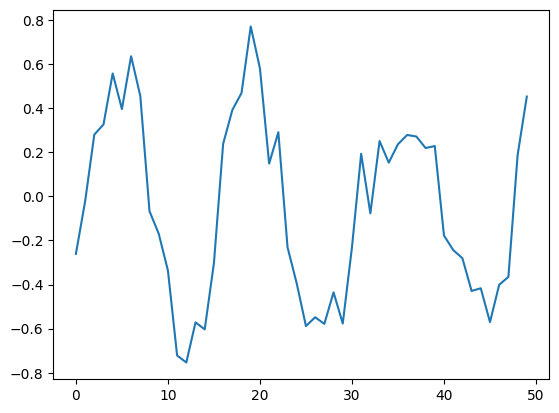

In [ ]:
plt.plot(x_test[1, :, 0], label='Série Original')

In [ ]:
series = generate_time_series_data(batch_size=1, n_steps=n_steps + 10)

x_new, y_new = series[:, :n_steps], series[:, -1]
X = x_new 
for step in range(n_steps):
    ypred  = model.predict(X[:, step:step + 1])[:, np.newaxis, :]
    X = np.concatenate([X, ypred], axis=1)

y_pred_ = X[:, n_steps:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━

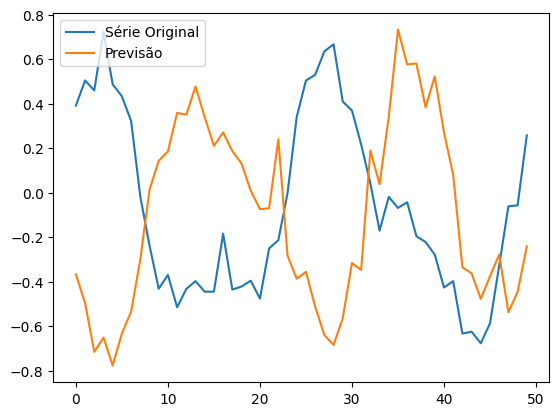

In [ ]:
#plot 
plt.plot(x_test[0, :, 0], label='Série Original')
plt.plot(y_pred_[0, :, 0], label='Previsão')
plt.legend()

## Series temporais longas

### Gradientes Instaveis
Muitos truques que usamos em redes neurais profundas podem ser utilizada para redes neuraisa recorrentes.
1. Boa inicializalção dos parametros
2. Otimizadores mais rápidos
3. Dropout
4. etc.

Usar funções de ativação saturadores como função de ativação tangente hiperbolica

In [3]:
keras.layers.SimpleRNN

keras.src.layers.rnn.simple_rnn.SimpleRNN

> Continuo o conteudo no  https://github.com/kaladabrio2020/livro-analise-pratica-series-temporais/tree/main/capitulo%2010%20-%20aprendizado%20profundo%20para%20series%20temporais